<a href="https://colab.research.google.com/github/dddonghwa/deep-learning-with-python/blob/main/ch01_mathematical_components_of_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 02 | 시작하기 전에 : 신경망의 수학적 구성 요소

## 2.1 신경망과의 첫 만남

#### MNIST 데이터세트

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png'>   
*이미지 출처 : 위키피디아*

In [1]:
! pip install keras

In [5]:
# 코드 2-1 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#### 신경망 구조
- 2개의 신경망 층(layer)
- 28*28인 데이터 입력 → 512개의 뉴런 (은닉층) → 10개의 뉴런 (소프트맥스/출력 층)

In [7]:
# 코드 2-2 신경망 구조

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

#### 컴파일 단계
1) 손실 함수 : 출력값과 타겟값의 차이를 계산하는 함수  
2) 옵티마이저 : 손실함수를 감소시키는 방향으로 신경망을 업데이트하는 메커니즘   
3) 훈련과 테스트 과정을 모니터링할 지표

In [8]:
# 코드 2-3 컴파일 단계

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

데이터를 신경망에 맞는 크기(n_images, n_pixels)로 바꾸고 모든 값을 (0,1) 사이 값으로 스케일링

In [10]:
# 코드 2-4 이미지 데이터 준비하기

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [12]:
! pip install np_utils

     |████████████████████████████████| 61 kB 4.7 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=a976fca274bac690c1fb3c08234ebd4934c187116042490f7a8c005a22b479d4
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


범주형 데이터인 레이블을 원핫인코딩으로

In [13]:
# 코드 2-5 레이블 준비하기
from keras.utils.np_utils import to_categorical
# from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


모델 학습

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2540 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1033 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0367 - accuracy: 0.9894


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc :", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9797
test_acc : 0.9797000288963318


#### 결과
- 훈련 세트 정확도 98.94%, 테스트 세트 정확도 : 97.97% → 과적합

## 2.2 신경망을 위한 데이터 표현

#### ndim
- 데이터의 차원수 
- 텐서의 축 개수, 랭크(rank)라고도 부름


In [19]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


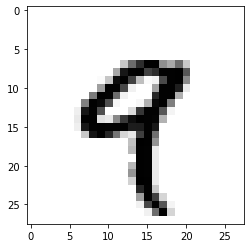

In [22]:
# 코드 2-6 다섯번째 이미지 출력하기

digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.7 배치 데이터